In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Question 1
**A brief description of where the data came from:** \
 The dataset that I am using is the client credit default dataset from UCI machine learning. The dataset contains the information of 30000 clients with 25 features. The response vatiable is binary. 0 represents no default and 1 represents default. The dataset is unbalanced with 77.88% of 0s and 22.12% of 1s.\
The initial investigation includes checking the distribution of all the variables, as well as the correlatoin between the response variables. 

For data preprocessing, I did not scale the predictors because it woont't affect tree based model. I did check the missing values. There is no missing value in the data. 

In [ ]:
# import the dataset
df = pd.read_csv('https://raw.githubusercontent.com/FederatedAI/FATE/master/examples/data/UCI_Credit_Card.csv')

In [ ]:
#distribution of variables
df.describe().T
#check missing values
#missing_values = df.isnull().sum()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


The PAY_AMTs are very right skewed.

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# plot the distributions for each variable
sns.distplot(df["PAY_AMT1"], ax=axs[0, 0])
sns.distplot(df["PAY_AMT2"], ax=axs[0, 1])
sns.distplot(df["PAY_AMT3"], ax=axs[0, 2])
sns.distplot(df["PAY_AMT4"], ax=axs[1, 0])
sns.distplot(df["PAY_AMT5"], ax=axs[1, 1])
sns.distplot(df["PAY_AMT6"], ax=axs[1, 2])

plt.suptitle('Distribution of Payment')

plt.show()

From the plot below, we can see that sex 1 (female) seems to more likely to defauult.

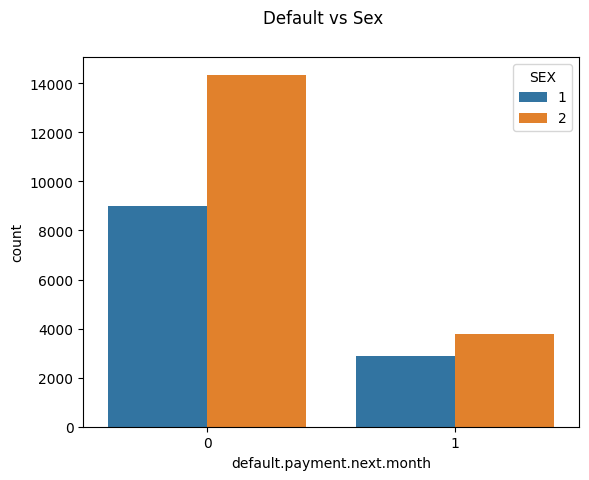

In [ ]:
sns.countplot(x="default.payment.next.month", hue="SEX", data=df)
plt.suptitle('Default vs Sex')

plt.show()

**Some initial investigation of the data [which textual or graphical summaries did you investigate? Did you find anything unusual?]:**\

Usually, it is not necessary to avoid multicolinearity for tree based model as well, since they do not have assumptoins for tht. However, for the purpose of savingcomputational power, we delete the highe=ly correlated variables. We compute the correlation matrix and take the absolute value. We check the correlation of the predictors. The payment variables and the bill variables are highly correlated. There are probabily some autocorrelation between these variables since they are related to time. Here, to avoid multicolinearity, we remove the variables with correlations higher than 0.7. 

<Axes: >

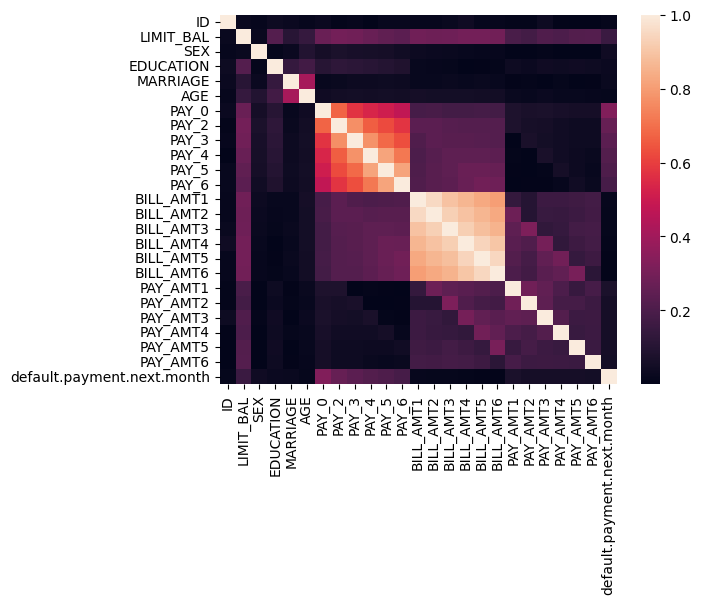

In [ ]:
# check correlations 
corr=df.corr().abs() 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
corr_matrix_abs = df.corr().abs()

upper_tri = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
df = df.drop(to_drop, axis=1)

<ipython-input-6-ae2fd0ad33cd>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(np.bool))


**Preprocessing step(s) [scaling, feature engineering/variable selection {based on predictors only}, lumping or dropping categories from predictors, one-hot encoding, etc.]**

I did not scale the variables because it is not necessary to scale the variables for tree based methods. I will scale it if I am doing logistic regression. In addiition, I will not do one-hot encoding for education and marrige, although they are actually categorical. Tree-based methods does not need it. The data is unbalanced, I would balance it if I am using regression methods.  

**Model choice**:
We can use decision trees, or random forest. Decision tree is too simple. So here I will use random forest first. I will use random search (instead of grid search) to tune the hyperparameter. I used negative log loss function - something similar to corss entropy as loss function.

In [ ]:
#split train and test
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rf = RandomForestClassifier(random_state=42)

In [ ]:
param_dist = {
    'n_estimators': np.arange(10, 500, 10), # controls the number of decision trees that are built in the forest
    'max_depth': [None] + list(np.arange(5, 21, 5)), #
    'min_samples_split': np.arange(2, 6),
    'min_samples_leaf': np.arange(1, 4),
    'max_features': ['auto', 'sqrt']
}
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=4, scoring='neg_log_loss', n_jobs=-1, random_state=42)
random_search.fit(X, y)

In [ ]:
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", -1 * random_search.best_score_)

In [ ]:
rf = RandomForestClassifier(n_estimators=random_search.best_params_['n_estimators'], 
                             max_depth=random_search.best_params_['max_depth'], 
                             min_samples_split=random_search.best_params_['min_samples_split'], 
                             min_samples_leaf=random_search.best_params_['min_samples_leaf'], 
                             max_features=random_search.best_params_['max_features'], 
                             random_state=42)
rf.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=5, max_features='auto', min_samples_leaf=3,
                       min_samples_split=5, n_estimators=200, random_state=42)

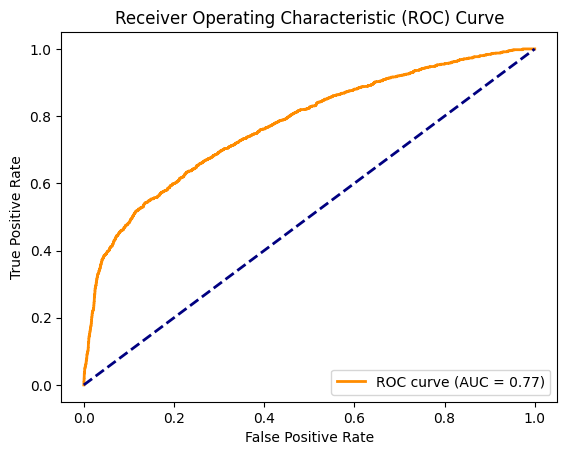

In [ ]:
y_pred = rf.predict(X_test)

y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Instead of looking at f1 scores and accuracy, I think it is more informative to look at the model performance at different threshold. Therefore, I used ROC curve as well as auc to check the model. The area under the curve is 0.77 indicating the model is being able to correctly classify 77% of the positive samples higher than the negative samples.


<BarContainer object of 15 artists>

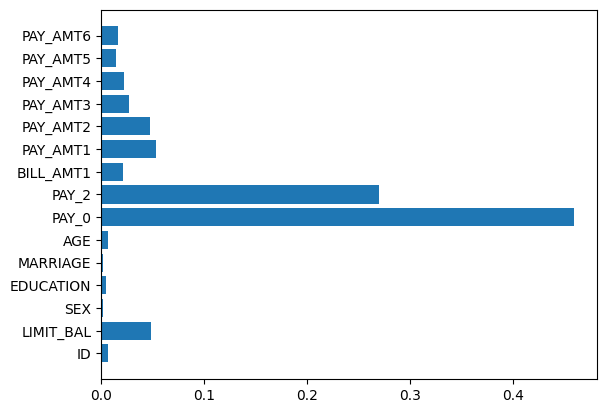

In [ ]:
importances = rf.feature_importances_
plt.barh(X_test.columns, rf.feature_importances_)

The importance of a variable is based on the reduction in the impurity of the decision trees when the variable is used for splitting the data, averaged across all trees in the forest. The feature importance plot shown as above indicates that the repayment status at month 0 is the most important. Actually all pay seems important, in addition, payment amount at each phase and limi balance are also important.